# 과제 4

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame
import random

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.metrics as skl
import sklearn.model_selection as sklm

#소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
#데이터 불러오기
data = pd.read_csv('house_sales2.csv')
data

,PropertyID,AdjSalePrice,PropertyType,SqFtLot,SqFtTotLiving,Bathrooms,Bedrooms,BldgGrade,NewConstruction
0,1000102,300805.0,Multiplex,9373,2400,3.00,6,7,False
1,1200013,1076162.0,Single Family,20156,3764,3.75,4,10,True
2,1200019,761805.0,Single Family,26036,2060,1.75,4,8,False
3,2800016,442065.0,Single Family,8618,3200,3.75,5,7,False
4,2800024,297065.0,Single Family,8620,1720,1.75,4,7,False
...,...,...,...,...,...,...,...,...,...
22682,9842300710,443803.0,Single Family,5468,1480,1.75,3,7,False
22683,9845500010,1586196.0,Single Family,23914,4720,4.50,4,11,False
22684,9899200010,220744.0,Single Family,11170,1070,1.00,4,6,False
22685,9900000355,342207.0,Single Family,6223,1345,2.00,3,7,False


## 1. 수치형 요인변수(독립변수)를 1개씩 사용한 단순선형회귀모델

In [3]:
# SqFtLot을 사용한 모델
model1 = smf.ols("AdjSalePrice ~ SqFtLot", data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     434.9
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.12e-95
Time:                        23:32:53   Log-Likelihood:            -3.2378e+05
No. Observations:               22687   AIC:                         6.476e+05
Df Residuals:                   22685   BIC:                         6.476e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.438e+05   2734.439    198.884      0.000    5.38e+05    5.49e+05
SqFtLot        1.8216      0.087     20.854      0.000       1.650       1.993
==============================================================================
Omnibus:                    26397.463   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6073374.803
Skew:                           5.856   Prob(JB):                         0.00
Kurtosis:                      82.295   Cond. No.                     3.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# SqFtLot모델에 대한 RMSE
print(np.sqrt(skl.mean_squared_error(data['AdjSalePrice'],model1.predict(data['SqFtLot']))))

381752.6356175378


In [5]:
# SqFtTotLiving을 사용한 모델
model2 = smf.ols("AdjSalePrice ~ SqFtTotLiving", data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1650e+05
No. Observations:               22687   AIC:                         6.330e+05
Df Residuals:                   22685   BIC:                         6.330e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.468e+04   4573.817     -9.768      0.000   -5.36e+04   -3.57e+04
SqFtTotLiving   293.2027      2.013    145.646      0.000     289.257     297.149
==============================================================================
Omnibus:                    27420.315   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12394664.745
Skew:                           6.017   Prob(JB):                         0.00
Kurtosis:                     116.874   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# SqFtTotLiving모델에 대한 RMSE
print(np.sqrt(skl.mean_squared_error(data['AdjSalePrice'],model2.predict(data['SqFtTotLiving']))))

277047.4884245792


In [7]:
# Bathrooms을 사용한 모델
model3 = smf.ols("AdjSalePrice ~ Bathrooms", data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     8821.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.2027e+05
No. Observations:               22687   AIC:                         6.405e+05
Df Residuals:                   22685   BIC:                         6.406e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.267e+04   6525.069     -1.941      0.052   -2.55e+04     121.886
Bathrooms   2.655e+05   2827.119     93.918      0.000     2.6e+05    2.71e+05
==============================================================================
Omnibus:                    26091.094   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7245659.498
Skew:                           5.649   Prob(JB):                         0.00
Kurtosis:                      89.818   Cond. No.                         8.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Bathrooms모델에 대한 RMSE
print(np.sqrt(skl.mean_squared_error(data['AdjSalePrice'],model3.predict(data['Bathrooms']))))

327024.59855216957


In [9]:
# Bedrooms을 사용한 모델
model4 = smf.ols("AdjSalePrice ~ Bedrooms", data = data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2448.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.2283e+05
No. Observations:               22687   AIC:                         6.457e+05
Df Residuals:                   22685   BIC:                         6.457e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.174e+05   9373.550     12.520      0.000     9.9e+04    1.36e+05
Bedrooms     1.33e+05   2688.098     49.474      0.000    1.28e+05    1.38e+05
==============================================================================
Omnibus:                    26089.523   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6272485.306
Skew:                           5.708   Prob(JB):                         0.00
Kurtosis:                      83.655   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Bedrooms모델에 대한 RMSE
print(np.sqrt(skl.mean_squared_error(data['AdjSalePrice'],model4.predict(data['Bedrooms']))))

366146.96526850795


In [11]:
# BldgGrade을 사용한 모델
model5 = smf.ols("AdjSalePrice ~ BldgGrade", data = data).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                 1.905e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1708e+05
No. Observations:               22687   AIC:                         6.342e+05
Df Residuals:                   22685   BIC:                         6.342e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.129e+06   1.24e+04    -90.893      0.000   -1.15e+06    -1.1e+06
BldgGrade   2.206e+05   1598.222    138.004      0.000    2.17e+05    2.24e+05
==============================================================================
Omnibus:                    29874.013   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17522016.221
Skew:                           7.028   Prob(JB):                         0.00
Kurtosis:                     138.420   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# BldgGrade모델에 대한 RMSE
print(np.sqrt(skl.mean_squared_error(data['AdjSalePrice'],model5.predict(data['BldgGrade']))))

284151.24883437064


각 모델에 대한 b0, b1, RMSE, R-squared
- SqFtLot
   - b0: 5.438e+05
   - b1: 1.8216 
   - RMSE: 381752.6356175378
   - R-squared: 0.019
- SqFtTotLiving
   - b0: -4.468e+04
   - b1: 293.2027
   - RMSE: 277047.4884245792
   - R-squared: 0.483
- Bathrooms
   - b0: -1.267e+04
   - b1: 2.655e+05
   - RMSE: 327024.59855216957
   - R-squared: 0.280
- Bedrooms
   - b0: 1.174e+05
   - b1: 1.33e+0.5
   - RMSE: 366146.96526850795
   - R-squared: 0.097
- BldgGrade
   - b0: -1.129e+06
   - b1: 2.206e+05
   - RMSE: 284151.24883437064
   - R-squared: 0.456

-> SqFtTotLiving, BldgGrade, Bathrooms, Bedrooms, SqFtLot 순으로 설명력이 좋은 모델이다. 

## 2. 범주형 요인변수를 이용한 단순선형회귀모델

In [13]:
# PropertyType을 사용한 모델
model6 = smf.ols("AdjSalePrice ~ PropertyType", data = data).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     92.09
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.47e-40
Time:                        23:32:54   Log-Likelihood:            -3.2390e+05
No. Observations:               22687   AIC:                         6.478e+05
Df Residuals:                   22684   BIC:                         6.478e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      5.481e+05   2.39e+04     22.889      0.000    5.01e+05    5.95e+05
PropertyType[T.Single Family]  2.732e+04   2.41e+04      1.134      0.257   -1.99e+04    7.45e+04
PropertyType[T.Townhouse]     -1.036e+05   2.57e+04     -4.033      0.000   -1.54e+05   -5.32e+04
==============================================================================
Omnibus:                    26390.295   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6031461.690
Skew:                           5.856   Prob(JB):                         0.00
Kurtosis:                      82.015   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept
  - 5.481e+05
- PropertyType[Single Family]
  - 2.732e+04
- PropertyType[Townhouse]
  - -1.036e+05	

-> Single Family와 Townhouse에 따라 Multiplex값은 자동으로 할당되기 때문에 따로 지정해 줄 필요가 없다.위의 계수들은 Multiplex에 대한 상대적인 값으로, Single Family는 27320정도 높은 값을 예측하고, Townhouse는 103600정도 낮은 값을 예측한다.

In [14]:
# NewConstruction을 사용한 모델
model7 = smf.ols("AdjSalePrice ~ NewConstruction", data = data).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     38.08
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           6.92e-10
Time:                        23:32:54   Log-Likelihood:            -3.2397e+05
No. Observations:               22687   AIC:                         6.480e+05
Df Residuals:                   22685   BIC:                         6.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.598e+05   2703.190    207.095      0.000    5.55e+05    5.65e+05
NewConstruction[T.True]  5.136e+04   8323.265      6.171      0.000     3.5e+04    6.77e+04
==============================================================================
Omnibus:                    26399.319   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5969240.140
Skew:                           5.864   Prob(JB):                         0.00
Kurtosis:                      81.595   Cond. No.                         3.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Intercept
  - 5.598e+05
- NewConstruction[True]
  - 5.136e+04	
  
-> NewConstruction이 True일 때의 값은 False일 때보다 51360정도 높은 값을 예측한다.

## 3. 전진선택법을 이용하여 최적의 다중회귀모델 구하기

In [15]:
# 범주형 변수를 숫자로 변환하기
data['PropertyType'] = pd.get_dummies(data['PropertyType'], drop_first = True)
data['NewConstruction'] = pd.get_dummies(data['NewConstruction'],drop_first = True)
data

,PropertyID,AdjSalePrice,PropertyType,SqFtLot,SqFtTotLiving,Bathrooms,Bedrooms,BldgGrade,NewConstruction
0,1000102,300805.0,0,9373,2400,3.00,6,7,0
1,1200013,1076162.0,1,20156,3764,3.75,4,10,1
2,1200019,761805.0,1,26036,2060,1.75,4,8,0
3,2800016,442065.0,1,8618,3200,3.75,5,7,0
4,2800024,297065.0,1,8620,1720,1.75,4,7,0
...,...,...,...,...,...,...,...,...,...
22682,9842300710,443803.0,1,5468,1480,1.75,3,7,0
22683,9845500010,1586196.0,1,23914,4720,4.50,4,11,0
22684,9899200010,220744.0,1,11170,1070,1.00,4,6,0
22685,9900000355,342207.0,1,6223,1345,2.00,3,7,0


### 1과 2에서 만든 단일변수 회귀모델의 AIC, 수정 R-squared를 기준으로 전진선택법 이용

- R squared기준
  - SqFtTotLiving, BldgGrade, Bathrooms, Bedrooms, SqFtLot, PropertyType, NewConstruction
- AIC 기준
  - SqFtTotLiving, BldgGrade, Bathrooms, Bedrooms, SqFtLot, PropertyType, NewConstruction

->  SqFtTotLiving, BldgGrade, Bathrooms, Bedrooms, SqFtLot, PropertyType, NewConstruction 순으로 변수 추가

#### 1) 변수 0개

In [16]:
m0 = smf.ols("AdjSalePrice ~ 1", data = data).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 09 Nov 2021   Prob (F-statistic):                nan
Time:                        23:32:54   Log-Likelihood:            -3.2399e+05
No. Observations:               22687   AIC:                         6.480e+05
Df Residuals:                   22686   BIC:                         6.480e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.652e+05   2558.741    220.903      0.000     5.6e+05     5.7e+05
==============================================================================
Omnibus:                    26358.154   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5925604.154
Skew:                           5.849   Prob(JB):                         0.00
Kurtosis:                      81.305   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2) 변수 1개

In [17]:
m1 = smf.ols("AdjSalePrice ~ SqFtTotLiving", data = data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.121e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1650e+05
No. Observations:               22687   AIC:                         6.330e+05
Df Residuals:                   22685   BIC:                         6.330e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.468e+04   4573.817     -9.768      0.000   -5.36e+04   -3.57e+04
SqFtTotLiving   293.2027      2.013    145.646      0.000     289.257     297.149
==============================================================================
Omnibus:                    27420.315   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12394664.745
Skew:                           6.017   Prob(JB):                         0.00
Kurtosis:                     116.874   Cond. No.                     5.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3) 변수 2개

In [18]:
m2 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade", data = data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1539e+05
No. Observations:               22687   AIC:                         6.308e+05
Df Residuals:                   22684   BIC:                         6.308e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.756e+05   1.38e+04    -49.073      0.000   -7.03e+05   -6.49e+05
SqFtTotLiving   181.2660      3.007     60.275      0.000     175.371     187.160
BldgGrade      1.125e+05   2327.807     48.309      0.000    1.08e+05    1.17e+05
==============================================================================
Omnibus:                    29579.745   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18576470.639
Skew:                           6.860   Prob(JB):                         0.00
Kurtosis:                     142.511   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 4) 변수 3개

In [19]:
m3 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms", data = data).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     8634.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1535e+05
No. Observations:               22687   AIC:                         6.307e+05
Df Residuals:                   22683   BIC:                         6.307e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.687e+05   1.38e+04    -48.585      0.000   -6.96e+05   -6.42e+05
SqFtTotLiving   198.5209      3.553     55.870      0.000     191.556     205.486
BldgGrade      1.161e+05   2358.024     49.234      0.000    1.11e+05    1.21e+05
Bathrooms     -3.251e+04   3581.646     -9.076      0.000   -3.95e+04   -2.55e+04
==============================================================================
Omnibus:                    29655.117   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19014456.237
Skew:                           6.887   Prob(JB):                         0.00
Kurtosis:                     144.157   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 5) 변수 4개

In [20]:
m4 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms", data = data).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6672.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22682   BIC:                         6.304e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.224e+05   1.56e+04    -33.391      0.000   -5.53e+05   -4.92e+05
SqFtTotLiving   228.2288      3.851     59.267      0.000     220.681     235.777
BldgGrade      1.061e+05   2396.348     44.287      0.000    1.01e+05    1.11e+05
Bathrooms     -1.925e+04   3619.871     -5.317      0.000   -2.63e+04   -1.22e+04
Bedrooms      -4.764e+04   2486.224    -19.161      0.000   -5.25e+04   -4.28e+04
==============================================================================
Omnibus:                    29681.423   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19397030.121
Skew:                           6.892   Prob(JB):                         0.00
Kurtosis:                     145.582   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 6) 변수 5개

In [21]:
m5 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot", data = data).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:54   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 7) 변수 6개

In [22]:
m6 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType", data = data).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4449.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:55   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22680   BIC:                         6.304e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.354e+05   1.75e+04    -30.639      0.000    -5.7e+05   -5.01e+05
SqFtTotLiving   226.6106      4.102     55.247      0.000     218.571     234.650
BldgGrade      1.067e+05   2422.749     44.052      0.000    1.02e+05    1.11e+05
Bathrooms     -1.742e+04   3806.344     -4.577      0.000   -2.49e+04   -9962.519
Bedrooms      -4.827e+04   2506.411    -19.260      0.000   -5.32e+04   -4.34e+04
SqFtLot          -0.0664      0.061     -1.084      0.278      -0.187       0.054
PropertyType   1.177e+04   6760.522      1.741      0.082   -1482.362     2.5e+04
==============================================================================
Omnibus:                    29691.037   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19438281.015
Skew:                           6.895   Prob(JB):                         0.00
Kurtosis:                     145.734   Cond. No.                     3.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 8) 변수 7개 

In [23]:
m7 = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType + NewConstruction", data = data).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3888.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:55   Log-Likelihood:            -3.1505e+05
No. Observations:               22687   AIC:                         6.301e+05
Df Residuals:                   22679   BIC:                         6.302e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.233e+05   1.74e+04    -30.071      0.000   -5.57e+05   -4.89e+05
SqFtTotLiving     228.1398      4.082     55.895      0.000     220.140     236.140
BldgGrade        1.085e+05   2412.958     44.984      0.000    1.04e+05    1.13e+05
Bathrooms       -1.217e+04   3801.627     -3.202      0.001   -1.96e+04   -4722.122
Bedrooms        -5.064e+04   2498.003    -20.272      0.000   -5.55e+04   -4.57e+04
SqFtLot            -0.1390      0.061     -2.274      0.023      -0.259      -0.019
PropertyType    -1.248e+04   6905.269     -1.808      0.071    -2.6e+04    1051.414
NewConstruction -9.236e+04   5965.776    -15.481      0.000   -1.04e+05   -8.07e+04
==============================================================================
Omnibus:                    29671.738   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19568909.758
Skew:                           6.883   Prob(JB):                         0.00
Kurtosis:                     146.220   Cond. No.                     3.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- m4모델보다 m4 모델에 변수 SqFtLot를 추가한 m5 모델의 AIC값이 더 크게 나온다.
- 하지만 모든 변수를 넣은 m7 모델에서의 AIC값이 더 작고 R squared값이 가장 크다는 것을 고려하면 m7모델이 가장 적합한 모델인 것으로 보인다.

## 4. 5-fold cross validation 수행하기

In [24]:
Kfold = sklm.KFold(n_splits = 5)

In [25]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType + NewConstruction",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType + NewConstruction",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5332508843185273
validation set 수정 R squared
0.5981366097390859
-------------------------------
training set 수정 R squared
0.5428568266940346
validation set 수정 R squared
0.557279985033085
-------------------------------
training set 수정 R squared
0.548239292826439
validation set 수정 R squared
0.541943713580421
-------------------------------
training set 수정 R squared
0.5599900494326502
validation set 수정 R squared
0.48718648847911405
-------------------------------
training set 수정 R squared
0.5436110096393676
validation set 수정 R squared
0.5667067106674533
-------------------------------


- training set과 validation set의 수정 R squared의 차이가 크게 나오지 않는 것으로 보아 m7은 적절한 모델인 것으로 보인다 

## 5. 다중회귀모델에서 각각의 독립변수에 대한 편잔차그림을 그리기

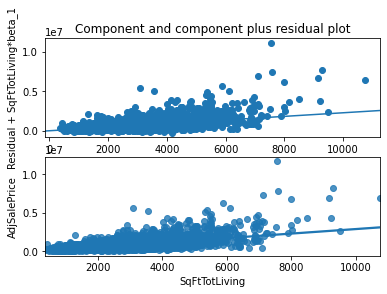

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'SqFtTotLiving',ax = ax1) # 편잔차그림
sns.regplot(x = 'SqFtTotLiving',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

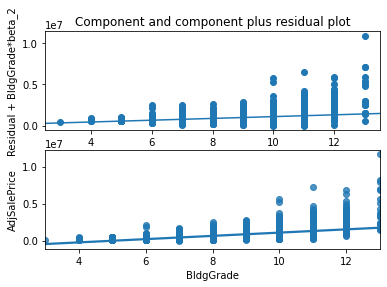

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'BldgGrade',ax = ax1) # 편잔차그림
sns.regplot(x = 'BldgGrade',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

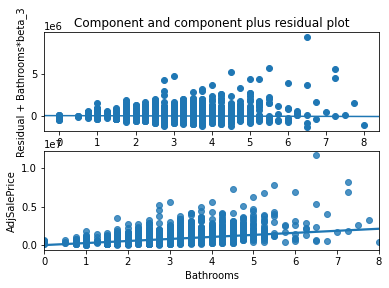

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'Bathrooms',ax = ax1) # 편잔차그림
sns.regplot(x = 'Bathrooms',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

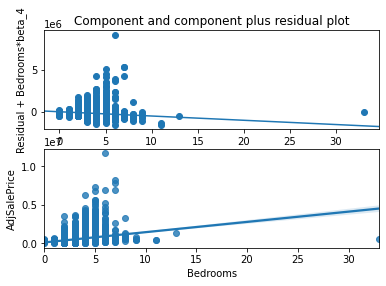

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2) 
sm.graphics.plot_ccpr(m7,'Bedrooms',ax = ax1) # 편잔차그림
sns.regplot(x = 'Bedrooms',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

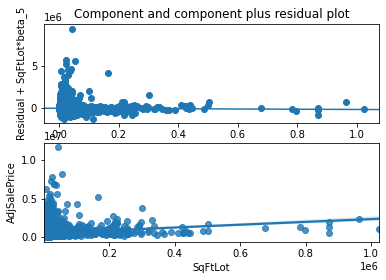

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'SqFtLot',ax = ax1) # 편잔차그림
sns.regplot(x = 'SqFtLot',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show() 

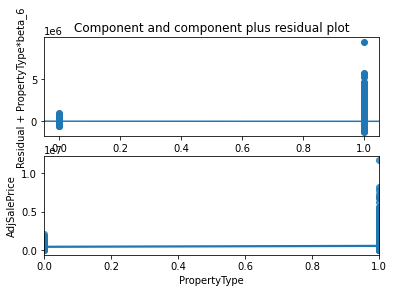

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'PropertyType',ax = ax1) # 편잔차그림
sns.regplot(x = 'PropertyType',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

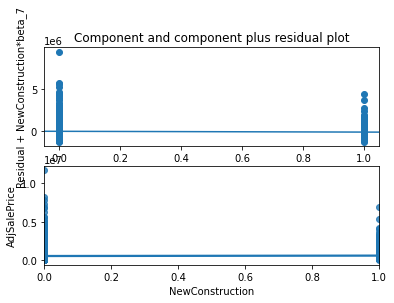

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
sm.graphics.plot_ccpr(m7,'NewConstruction',ax = ax1) # 편잔차그림
sns.regplot(x = 'NewConstruction',y = 'AdjSalePrice',data = data,ax = ax2) # regplot
plt.show()

-> 모델로 예측한 값과 대체로 비슷한 분포를 띠는 것을 확인할 수 있다
- 'Bedrooms' 변수에 대한 편잔차 그림과 regplot그림에서 outlier를 발견할 수 있다.
- 표준화잔차 값을 조사하여 특잇값을 발견할 수 있으므로 특잇값이 위치한 영역을 포함하도록 극단값을 제거하여 관찰한다. 

## 보너스) 전진선택법을 이용해 독립변수 1개짜리 모델부터 p개짜리 모델까지 순차적으로 독립변수 목록을 만든 뒤, 각각에 대해 5-fold cross validation을 수행하시오. 이를 통해 각각의 수정 R 제곱을 구해보고, 어느 모델에서 수정 R 제곱(혹은 다른 모델평가지표)이 가장 우수한지 살펴보세요.

#### 1) 변수 0개

In [33]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ 1",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ 1",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.0
validation set 수정 R squared
0.0
-------------------------------
training set 수정 R squared
0.0
validation set 수정 R squared
2.220446049250313e-16
-------------------------------
training set 수정 R squared
0.0
validation set 수정 R squared
0.0
-------------------------------
training set 수정 R squared
2.220446049250313e-16
validation set 수정 R squared
0.0
-------------------------------
training set 수정 R squared
0.0
validation set 수정 R squared
0.0
-------------------------------


#### 2) 변수 1개

In [34]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.4752599219981172
validation set 수정 R squared
0.5163426938742661
-------------------------------
training set 수정 R squared
0.4797037416607549
validation set 수정 R squared
0.49738654412830563
-------------------------------
training set 수정 R squared
0.48440733490356924
validation set 수정 R squared
0.4849464230091709
-------------------------------
training set 수정 R squared
0.4943311059222437
validation set 수정 R squared
0.4382699745974319
-------------------------------
training set 수정 R squared
0.48307221419977964
validation set 수정 R squared
0.4922694810343111
-------------------------------


#### 3) 변수 2개

In [35]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5194878106501961
validation set 수정 R squared
0.5824592574544321
-------------------------------
training set 수정 R squared
0.5285425793357514
validation set 수정 R squared
0.5444774246702796
-------------------------------
training set 수정 R squared
0.5355461792437619
validation set 수정 R squared
0.5221466073293619
-------------------------------
training set 수정 R squared
0.545772611661618
validation set 수정 R squared
0.4742048424267207
-------------------------------
training set 수정 R squared
0.5288233242896456
validation set 수정 R squared
0.5554629525185029
-------------------------------


#### 4) 변수 3개

In [36]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5207439704749603
validation set 수정 R squared
0.5862499155887071
-------------------------------
training set 수정 R squared
0.5305157465941811
validation set 수정 R squared
0.5451077966619532
-------------------------------
training set 수정 R squared
0.5371246609357438
validation set 수정 R squared
0.5244378447160671
-------------------------------
training set 수정 R squared
0.547854099658861
validation set 수정 R squared
0.47458097575574787
-------------------------------
training set 수정 R squared
0.5303812671903501
validation set 수정 R squared
0.5581177077789765
-------------------------------


#### 5) 변수 4개

In [37]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5281806169084481
validation set 수정 R squared
0.5936306179929229
-------------------------------
training set 수정 R squared
0.5382270267843963
validation set 수정 R squared
0.5516051842637247
-------------------------------
training set 수정 R squared
0.5443147847660244
validation set 수정 R squared
0.5326597057750391
-------------------------------
training set 수정 R squared
0.5551727846376089
validation set 수정 R squared
0.4818695797156147
-------------------------------
training set 수정 R squared
0.5377884258643768
validation set 수정 R squared
0.5652102958191434
-------------------------------


#### 6) 변수 5개

In [38]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5281571286551305
validation set 수정 R squared
0.5936118246369827
-------------------------------
training set 수정 R squared
0.5382036345281991
validation set 수정 R squared
0.5518041015507735
-------------------------------
training set 수정 R squared
0.5442957626427025
validation set 수정 R squared
0.5326097521564094
-------------------------------
training set 수정 R squared
0.5551973073405512
validation set 수정 R squared
0.48219086298584746
-------------------------------
training set 수정 R squared
0.5378367610551555
validation set 수정 R squared
0.5652556719978771
-------------------------------


#### 7) 변수 6개

In [39]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5281338162147158
validation set 수정 R squared
0.5945381950967563
-------------------------------
training set 수정 R squared
0.5383188580629839
validation set 수정 R squared
0.5517269533111446
-------------------------------
training set 수정 R squared
0.5443710250212987
validation set 수정 R squared
0.5325071093616838
-------------------------------
training set 수정 R squared
0.5552706467256008
validation set 수정 R squared
0.48208233311898196
-------------------------------
training set 수정 R squared
0.5378458850575063
validation set 수정 R squared
0.5654055148026582
-------------------------------


#### 8) 변수 7개

In [40]:
for training_id, validation_id in Kfold.split(data):

    training = data.iloc[training_id]
    validation = data.iloc[validation_id]

    mtraining = smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType + NewConstruction",data = training).fit()
    mvalidation =smf.ols("AdjSalePrice ~ SqFtTotLiving + BldgGrade + Bathrooms + Bedrooms + SqFtLot + PropertyType + NewConstruction",data = validation).fit()
    
    print('training set 수정 R squared')
    print(mtraining.rsquared_adj)
    print('validation set 수정 R squared')
    print(mvalidation.rsquared_adj)
    print('-------------------------------')

training set 수정 R squared
0.5332508843185273
validation set 수정 R squared
0.5981366097390859
-------------------------------
training set 수정 R squared
0.5428568266940346
validation set 수정 R squared
0.557279985033085
-------------------------------
training set 수정 R squared
0.548239292826439
validation set 수정 R squared
0.541943713580421
-------------------------------
training set 수정 R squared
0.5599900494326502
validation set 수정 R squared
0.48718648847911405
-------------------------------
training set 수정 R squared
0.5436110096393676
validation set 수정 R squared
0.5667067106674533
-------------------------------


-> R squared값은 변수 개수가 늘어날 수록 점차 증가하는 것을 확인해 볼 수 있다. 따라서 변수 7개가 모두 들어간 모델 7에서의 수정 R squared값이 가장 우수하게 나온다. 